In [1]:
%matplotlib nbagg
import jungfrau_utils as ju
import numpy as np
import json
import os, glob
import time
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
from scipy.optimize import curve_fit
from IPython.display import clear_output, display
import matplotlib.colors as colors

import h5py
from ipyfilechooser import FileChooser

from alvra_tools import *
from alvra_tools.channels import *
#from alvra_tools.channels_raw import *

## Next cells for a single scan

In [2]:
# Choose a pedestal file (usually located in /sf/alvra/data/*pgroup*/raw/JF_pedestals) 
# if you do not want to use the closest in time
# If 'None' the closest in time is selected

# pedestal_file = "/sf/alvra/data/p17983/res/JF_pedestals/pedestal_20190727_2115.JF02T09V02.res.h5"
pedestal_file = None

In [17]:
scan_name ="Co_XAS_004/"

DIR = "/sf/alvra/data/p18836/raw/scan_data/" + scan_name

!ls -lah -t $DIR  | grep JF

!hostname

listfile = os.listdir(DIR)
number_files = len(listfile)
print ("There are",number_files,"files in the folder", DIR)

-rw-r--r--. 1 root p18836 1002M Dec  3 09:13 run_000432.JF04T01V01.h5
-rw-r--r--. 1 root p18836 1002M Dec  3 09:12 run_000431.JF04T01V01.h5
-rw-r--r--. 1 root p18836 1002M Dec  3 09:12 run_000430.JF04T01V01.h5
-rw-r--r--. 1 root p18836 1002M Dec  3 09:12 run_000429.JF04T01V01.h5
-rw-r--r--. 1 root p18836 1002M Dec  3 09:12 run_000428.JF04T01V01.h5
-rw-r--r--. 1 root p18836 1002M Dec  3 09:11 run_000427.JF04T01V01.h5
-rw-r--r--. 1 root p18836 1002M Dec  3 09:11 run_000426.JF04T01V01.h5
-rw-r--r--. 1 root p18836 1002M Dec  3 09:11 run_000425.JF04T01V01.h5
-rw-r--r--. 1 root p18836 1002M Dec  3 09:11 run_000424.JF04T01V01.h5
-rw-r--r--. 1 root p18836 1002M Dec  3 09:11 run_000423.JF04T01V01.h5
-rw-r--r--. 1 root p18836 1002M Dec  3 09:10 run_000422.JF04T01V01.h5
-rw-r--r--. 1 root p18836 1002M Dec  3 09:10 run_000421.JF04T01V01.h5
-rw-r--r--. 1 root p18836 1002M Dec  3 09:10 run_000420.JF04T01V01.h5
-rw-r--r--. 1 root p18836 1002M Dec  3 09:10 run_000419.JF04T01V01.h5
-rw-r--r--. 1 root p

/sf/alvra/data/p18836/raw/scan_data/Co_XAS_004/run_000405.JF04T01V01.h5
Auto-located gain file: /sf/alvra/config/jungfrau/gainMaps/JF04T01V01/gains.h5
Auto-located pedestal file: /sf/alvra/data/p18836/raw/JF_pedestals/run_000001.JF04T01V01.res.h5
jungfrau file: 09:07 03.12.2020
pedestal file: 15:35 02.12.2020
    mtime difference: 17:32:07.196740
Total number of images = 1001
Shape of image: (514, 1030)
It took 0.22 seconds to process this file


<IPython.core.display.Javascript object>


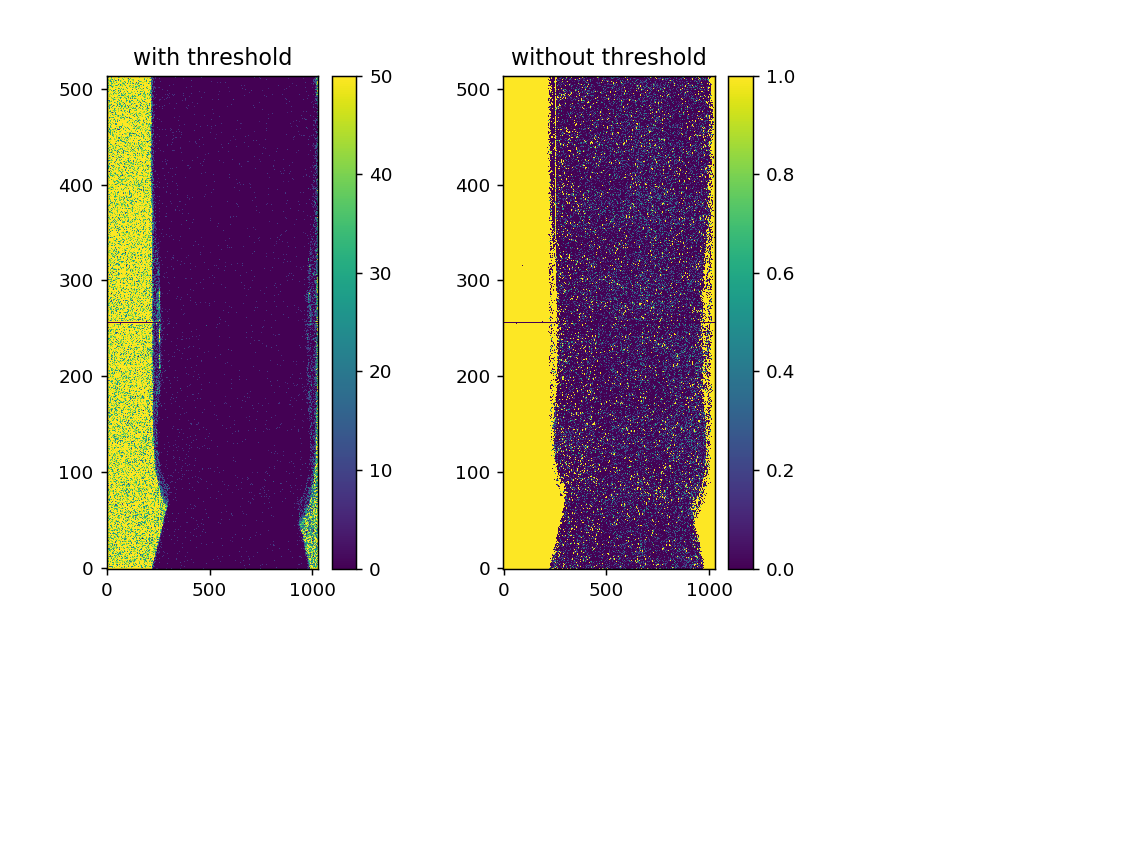

In [22]:
# First we load the first images of a file to check if everything is fine with the pedestal &  files (check high True or False)
# We can see also how the ROIs look like (will be useful later)

fileName = "run_000405"

####################################################################
clock = Clock()

fileName = fileName + ".JF04T01V01.h5"

print(DIR + fileName)

nframes = 1
#nframes = images.shape[0]
total = 0
total_thr = 0

with ju.File(DIR + fileName, pedestal_file=pedestal_file) as juf:
    pulse_ids = juf["pulse_id"][:]
    print ('Total number of images = {}'.format(len(pulse_ids)))
    for i in range(nframes):
        image = juf[i, :]
        image_thr = image.copy()
        image_thr[image < 5] = 0
        total_thr += image_thr
        total += image
        #total /= nframes
    
print ("Shape of image: {}".format(total_thr.shape))
print ("It took", clock.tick(), "seconds to process this file")

#roi = [[225, 325], [6950, 7075]]
#roi = [[225, 325], [7900, 8450]]
#roi = [[0, total_corr.shape[0]], [0, total_corr.shape[1]]]

plt.figure()
plt.subplots_adjust(wspace=0.5)
plt.subplot(121)
plt.imshow(total_thr, origin="lower", aspect='auto', vmin=0, vmax=50)
plt.title("with threshold")
plt.colorbar()
plt.subplot(122)
plt.imshow(total, origin="lower", aspect='auto', vmin=0, vmax=1)
plt.title("without threshold")
plt.colorbar()
plt.show()


<IPython.core.display.Javascript object>


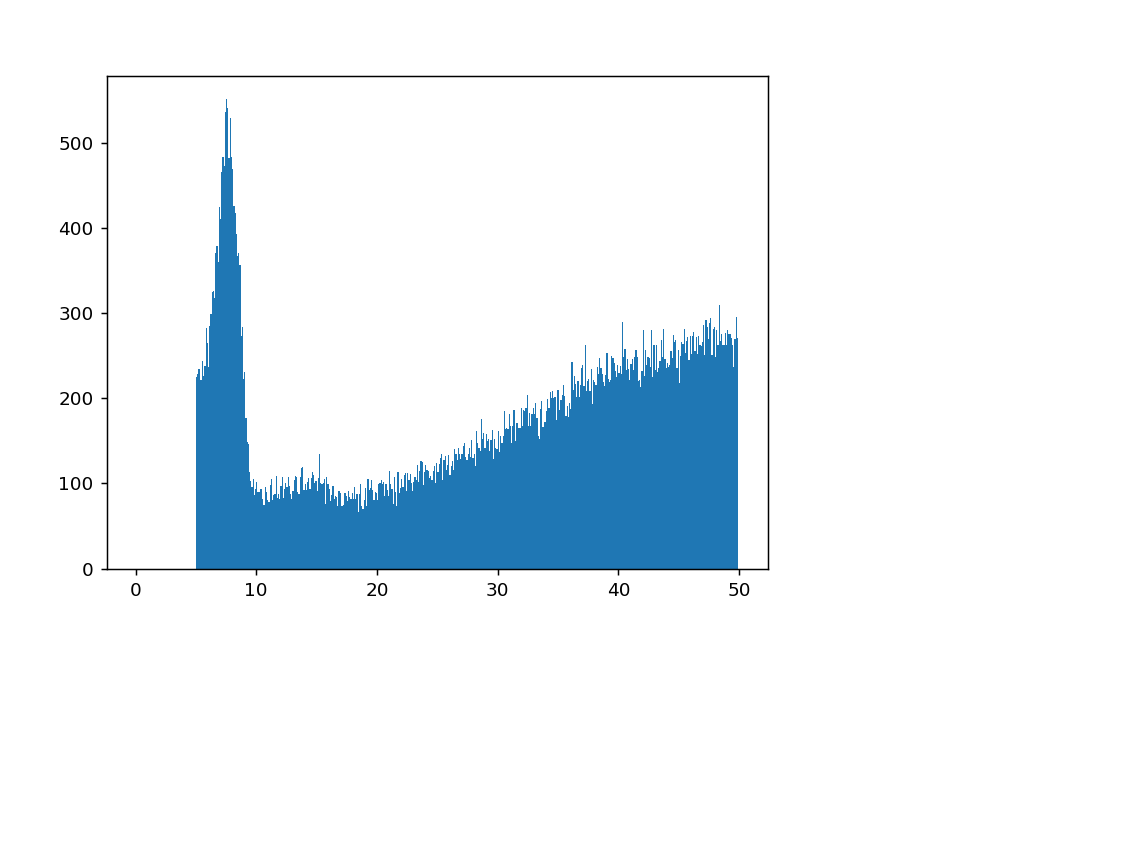

In [23]:
plt.figure()
plt.hist(total_thr.ravel(), bins=np.arange(0.1,50,0.1))
plt.show()

<IPython.core.display.Javascript object>


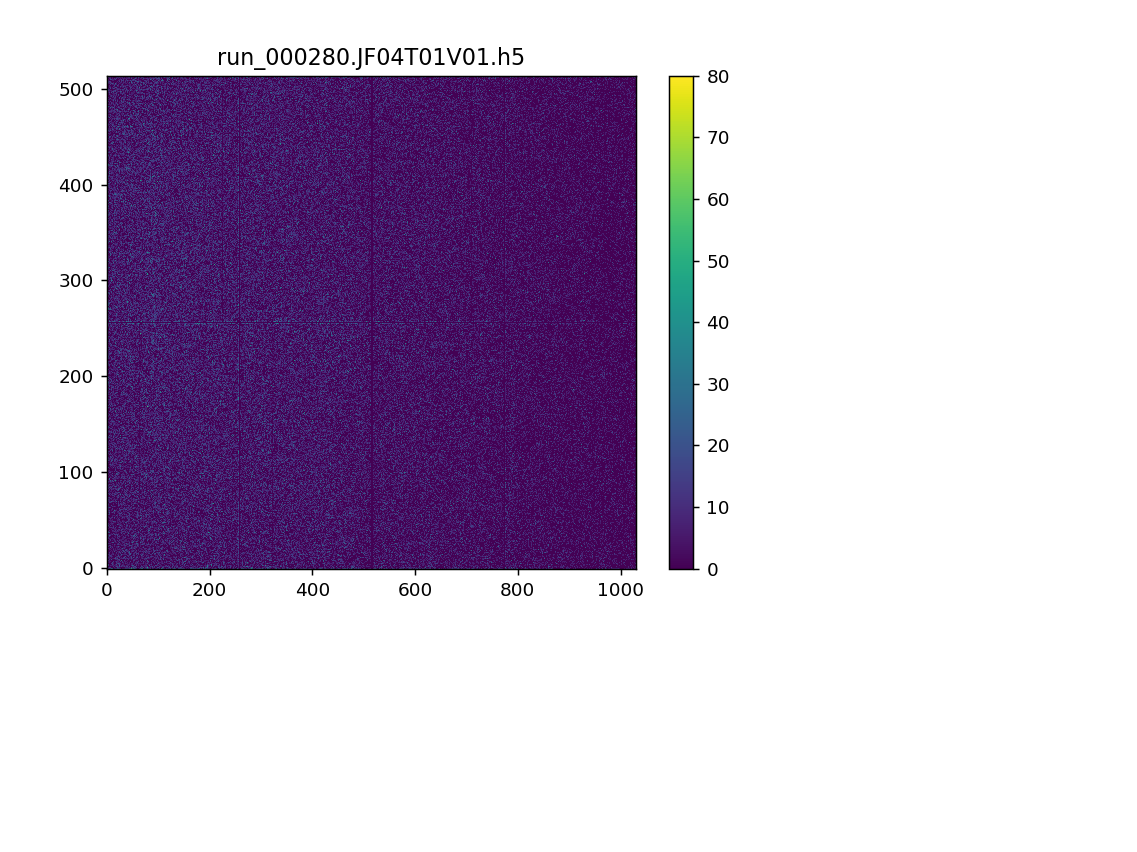

In [6]:
plt.figure()
plt.imshow(total_thr, origin="lower", aspect='auto', vmin=0, vmax=80)
plt.title(fileName)
plt.colorbar()
plt.show()

In [10]:
fc = FileChooser('/sf/alvra/data/p18836/raw/scan_info/')
fc.use_dir_icons = True
display(fc)

FileChooser(path='/sf/alvra/data/p18836/raw/scan_info', filename='', show_hidden='False')

In [8]:
from sfdata import SFScanInfo

json_file = fc.selected


data = SFScanInfo(json_file)
print (len(data))
data[0]

61
Auto-located gain file: /sf/alvra/config/jungfrau/gainMaps/JF04T01V01/gains.h5
Auto-located pedestal file: /sf/alvra/data/p18836/raw/JF_pedestals/run_000001.JF04T01V01.res.h5
jungfrau file: 08:59 03.12.2020
pedestal file: 15:35 02.12.2020
    mtime difference: 17:24:54.866771


SFDataFiles("/sf/alvra/data/p18836/raw/scan_data/Co_XAS_004/run_000372.BSDATA.h5", "/sf/alvra/data/p18836/raw/scan_data/Co_XAS_004/run_000372.BSREAD.h5", "/sf/alvra/data/p18836/raw/scan_data/Co_XAS_004/run_000372.JF04T01V01.h5"): 81 channels

In [64]:
quantile_band = 0.5
pid_roll = 31

channel_list = [channel_PIPS_trans, channel_Izero122, channel_PIPS_waveform, 'JF04T01V01']

threshold_low = 5
threshold_high = 10
####################################################################################################3

json_file = fc.selected
print (json_file)

with open(json_file) as file:
    data = json.load(file)
numFiles = len(data['scan_files'])
#numFiles = 1

print ("Processing",numFiles,"files")

XAS_JF = []
XAS_pips = []
Energy_eV = []

for i in range(0,numFiles):
    filename = str(data['scan_files'][i][0])
    #print (filename)
    exists = os.path.isfile(filename)
    if exists: # and i !=21:
        clear_output(wait=True)
        print("step", i+1, "of",numFiles, f": Processing {filename}")
        
        filenames = filename.replace('BSREAD', '*')
        results = load_data_compact(channel_list, filenames)
        
        data_trans_shot = -results[channel_PIPS_trans]
        data_JF = results['JF04T01V01']
        IzeroFEL_shot = results[channel_Izero122]
        
        waveform = results[channel_PIPS_waveform]
        
        nframes = data_JF.shape[0]
        print (nframes)
        data_JF_thr = np.copy(data_JF)
        
        for j in range(nframes):
            image = data_JF[j,:]
            image_thr = image.copy()
            image_thr[image < threshold_low] = 0
            #image_thr[image > threshold_high] = 0
            data_JF_thr[j,:] = image_thr[:]
        
        XASpips_shot_norm = data_trans_shot / IzeroFEL_shot
        XASJF_shot_norm = np.roll(data_JF_thr.sum(axis = 1).sum(axis = 1), pid_roll, axis = 0) / IzeroFEL_shot
        
        df_data_pips = pd.DataFrame(XASpips_shot_norm)
        XAS_pips.append(np.nanquantile(df_data_pips, [0.5, 0.5 - quantile_band/2, 0.5 + quantile_band/2]))
        
        df_data_JF = pd.DataFrame(XASJF_shot_norm)
        XAS_JF.append(np.nanquantile(df_data_JF, [0.5, 0.5 - quantile_band/2, 0.5 + quantile_band/2]))
        
        Energy_eV.append(data['scan_readbacks'][i][0]) ## Energy from the json file

XAS_JF = np.asarray(XAS_JF)
XAS_pips = np.asarray(XAS_pips)
Energy_eV = np.asarray(Energy_eV)
        
        
print ("Job done!")
print ('Quantiles for error bars: {},{}'.format(0.5 - quantile_band/2, 0.5 + quantile_band/2))

step 61 of 61 : Processing /sf/alvra/data/p18836/raw/scan_data/Co_XAS_003/run_000340.BSREAD.h5
Auto-located gain file: /sf/alvra/config/jungfrau/gainMaps/JF04T01V01/gains.h5
Auto-located pedestal file: /sf/alvra/data/p18836/raw/JF_pedestals/run_000001.JF04T01V01.res.h5
jungfrau file: 19:40 02.12.2020
pedestal file: 15:35 02.12.2020
    mtime difference: 4:05:36.250039

--------------------------------------------------------------------------------

JF04T01V01                1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SAR-CVME-TIFALL5:EvtSet   1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-GES1:CH1_BUFFER   1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-GES1:CH1_VAL_GET  1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SAROP11-PBPS122:INTENSITY 1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇

over the whole data set: 1001 / 1001 -> 0% loss
complete channels: 5 / 5 -> 0% incomplete

--------------------------------------------------------------------------------

FEL rep rate is 100.0 Hz
1001
Job done!
Quantiles for error bars: 0.25,0

<IPython.core.display.Javascript object>


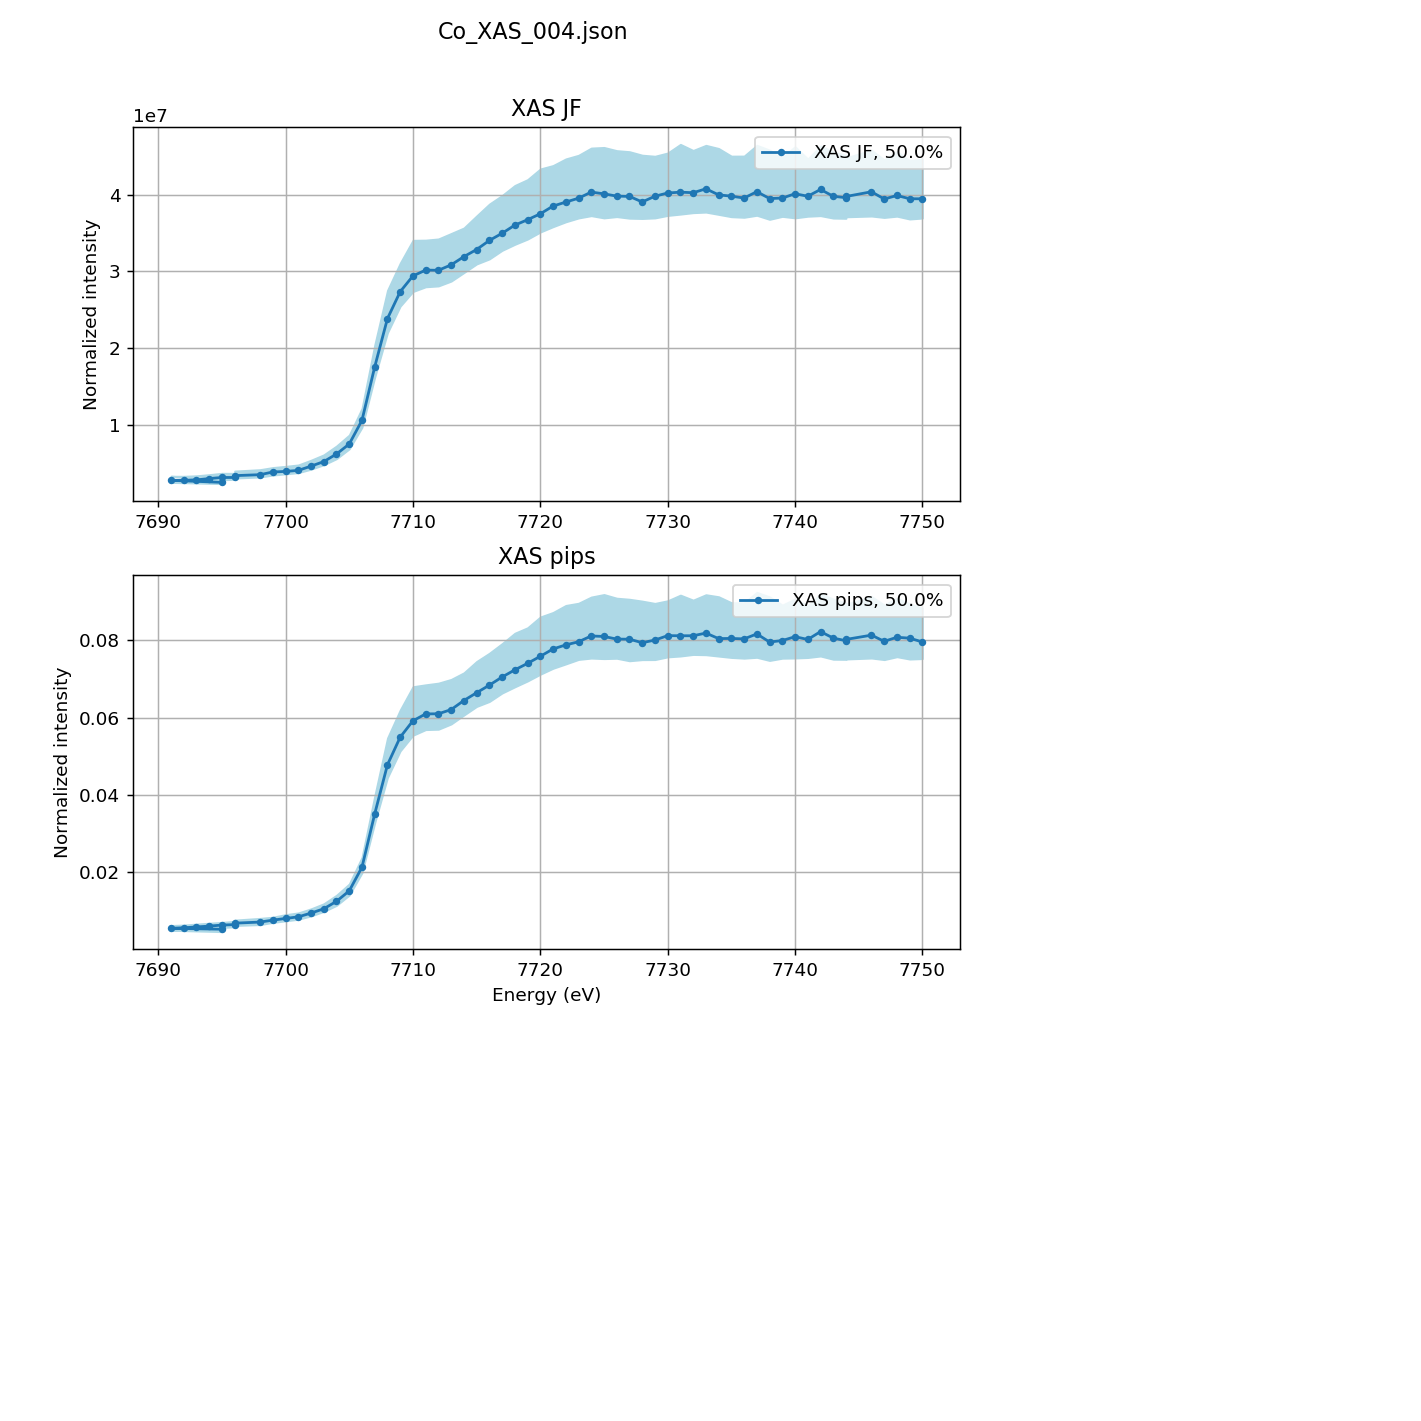

In [55]:
plt.figure(figsize = (8,8))
plt.suptitle (fc.selected_filename)

XAS1 = XAS_JF[:,0]
err_low1 = XAS_JF[:,1]
err_high1 = XAS_JF[:,2]

XAS2 = XAS_pips[:,0]
err_low2 = XAS_pips[:,1]
err_high2 = XAS_pips[:,2]

plt.subplot(211)
plt.plot(Energy_eV, XAS1, label='XAS JF, {}%'.format(quantile_band*100),marker='.')
plt.fill_between(Energy_eV, err_low1, err_high1, color='lightblue')

plt.title("XAS JF")
plt.ylabel('Normalized intensity')
#plt.xlabel("Energy (eV)")
plt.legend(loc="best")
plt.grid()

plt.subplot(212)
plt.plot(Energy_eV, XAS2, label='XAS pips, {}%'.format(quantile_band*100),marker='.')
plt.fill_between(Energy_eV, err_low2, err_high2, color='lightblue')

plt.title("XAS pips")
plt.ylabel('Normalized intensity')
plt.xlabel("Energy (eV)")
plt.legend(loc="best")
plt.grid()

plt.show()

# Now load all images with ROIs (single file)

In [10]:
files = ["run_000158"] # can be a list of files, counts will be summed up


roi1 = (0, 1024, 0, 500) # Ru La ROIs
roi2 = (0, 1024, 0, 500) 

roi3 = (0, 1024, 0, 500)   # Lb _not set correctly!
roi4 = (0, 1024, 0, 500)   # Kb_background

threshold_low = 5
threshold_high = 10

#Timezero = 194.6   # position of Timezero on PP delay (in mm!)
######################################################################################
start_time = time.time()
spectrum_roi1 = 0
spectrum_roi2 = 0
spectrum_roi3 = 0
spectrum_roi4 = 0
energy_eV = 0
Delay_mm_single = 0
        
for f in files:
    JF_single_file = DIR + f + ".JF04T01V01.h5"
    BS_single_file = DIR + f + ".BSREAD.h5"
    print("Processing file %s" % (JF_single_file))
    
#    photon_range = (6, 7)

    nshots = 100  # put this to None for ALL images
    #nshots = None

    images_roi1, images_roi2, images_roi3, images_roi4, pids = \
    load_crop_JF_data(JF_single_file, roi1, roi2, roi3, roi4, pedestal_file=pedestal_file, nshots=nshots)
    
#    delay, pids = load_single_channel_pulseID(BS_single_file, channel_delay, 50)
#    delay = [x for x in delay if (x > 0)]
#    Delay_mm_single = np.mean(delay)
#    Delay_ps_single = (Delay_mm_single - Timezero)*2/(3e8*1e3*1e-12) # in ps, change to right t0 !
    
#    Izero_pump, Izero_unpump, energy_eV, pulseIDs = \
#    load_FEL_pp_pulseID(BS_single_file, channel_energy, 50, 25, 50)  
    
    images_roi1_thr = images_roi1.copy()
    images_roi1_thr[images_roi1 < threshold_low] = 0
    images_roi1_thr[images_roi1 > threshold_high] = 0
#   images_ON_roi1 = convert_to_photon_num_range(images_ON_roi1)

    images_roi2_thr = images_roi2.copy()
    images_roi2_thr[images_roi2 < threshold_low] = 0
    images_roi2_thr[images_roi2 > threshold_high] = 0
#   images_ON_roi1 = convert_to_photon_num_range(images_ON_roi1)

    images_roi3_thr = images_roi3.copy()
    images_roi3_thr[images_roi3 < threshold_low] = 0
    images_roi3_thr[images_roi3 > threshold_high] = 0
#   images_ON_roi1 = convert_to_photon_num_range(images_ON_roi1)

    images_roi4_thr = images_roi4.copy()
    images_roi4_thr[images_roi4 < threshold_low] = 0
    images_roi4_thr[images_roi4 > threshold_high] = 0
#   images_ON_roi1 = convert_to_photon_num_range(images_ON_roi1)


    spectrum_roi1  += images_roi1_thr.sum(axis = 1).sum(axis = 0)
    spectrum_roi2  += images_roi2_thr.sum(axis = 1).sum(axis = 0)
    spectrum_roi3  += images_roi3_thr.sum(axis = 1).sum(axis = 0)
    spectrum_roi4  += images_roi4_thr.sum(axis = 1).sum(axis = 0)

print ("Job done! It took", round((time.time() - start_time), 2), "seconds to process", len(files), "file" if len(files) == 1 else "files")

Processing file /sf/alvra/data/p18836/raw/scan_data/Co_XAS_001/run_000158.JF04T01V01.h5
Auto-located gain file: /sf/alvra/config/jungfrau/gainMaps/JF04T01V01/gains.h5
Auto-located pedestal file: /sf/alvra/data/p18836/raw/JF_pedestals/run_000001.JF04T01V01.res.h5
jungfrau file: 18:27 02.12.2020
pedestal file: 15:35 02.12.2020
    mtime difference: 2:52:42.005176
Job done! It took 2.64 seconds to process 1 file


<IPython.core.display.Javascript object>


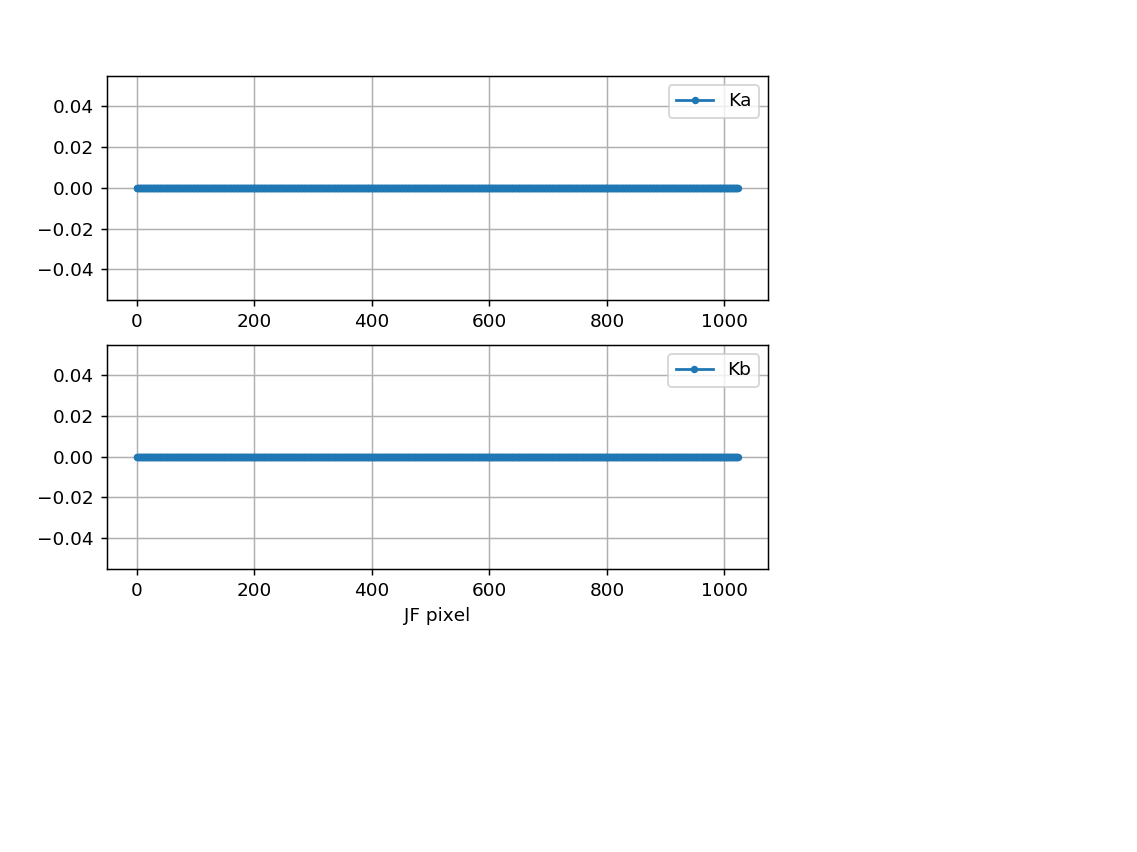

In [11]:
spectrum_bkg_roi1 = spectrum_roi1  - spectrum_roi2
err_spectrum_ro1 = np.sqrt(spectrum_roi1)
err_bkg_2 = np.sqrt(spectrum_roi2)

spectrum_bkg_roi3 = spectrum_roi3 - spectrum_roi4
err_spectrum_roi3 = np.sqrt(spectrum_roi3)
err_bkg_4 = np.sqrt(spectrum_roi4)


bin1_ = 1   # change the bin size if wanted, 1 is every pixel
bin3_ = 1

spectrum_bkg_1 = spectrum_bkg_roi1.copy()
spectrum_bkg_3 = spectrum_bkg_roi3.copy()
x_axis_1 = np.arange(roi1[0], roi1[1])
x_axis_3 = np.arange(roi3[0], roi3[1])


spectrum_rebin1  = bin_sum(spectrum_bkg_1,  bin1_)
x_axis_rebin1 = bin_mean(x_axis_1, bin1_)
spectrum_rebin3  = bin_sum(spectrum_bkg_3,  bin3_)
x_axis_rebin3 = bin_mean(x_axis_3, bin3_)


#low_err_Ka= (spectrum_rebin1)-np.sqrt(spectra_on_err1**2+spectra_off_err1**2)
#high_err_Kb= (spectra_on_rebin1 - spectra_off_rebin1)+np.sqrt(spectra_on_err1**2+spectra_off_err1**2)

#spectrumAllOutFoc=spectra_on_rebin1 + spectra_off_rebin1
plt.figure()
plt.subplot(211)
#plt.title(scan_name + ", delay = {} ps".format(str(np.round(Delay_ps_single,3))))
plt.plot(x_axis_rebin1, spectrum_rebin1, label="Ka", marker='.')
plt.legend(loc="best")
plt.grid()

plt.subplot(212)
#plt.title(scan_name + ", delay = {} ps".format(str(np.round(Delay_ps_single,3))))
plt.plot(x_axis_rebin3, spectrum_rebin3, label="Kb", marker='.')
plt.legend(loc="best")
plt.grid()

#plt.title(jf_file)
plt.xlabel("JF pixel")
plt.show()

# Next cells to sum up identical runs in the same folder (NOT FOR SCANS)

In [15]:
datalist_BS = glob(DIR + "*.BSREAD.h5")
datalist_BS = sorted(datalist_BS)
datalist_JF = glob(DIR + "*.JF02T09V02.h5")
datalist_JF = sorted(datalist_JF)

number_files_BS = len(datalist_BS)
number_files_JF = len(datalist_JF)

print ("Found {} BS files and {} JF files".format(len(datalist_BS), len(datalist_JF)))

Found 41 BS files and 41 JF files


In [ ]:
datalist_BS = glob.glob(DIR + "*.BSREAD.h5")
datalist_BS = sorted(datalist_BS)
datalist_JF = glob.glob(DIR + "*.JF02T09V02.h5")
datalist_JF = sorted(datalist_JF)

number_files_BS = len(datalist_BS)
number_files_JF = len(datalist_JF)

print ("Found {} BS files and {} JF files".format(len(datalist_BS), len(datalist_JF)))

spectrum_final1 = 0
spectrum_final3 = 0

roi1 = (5000, 5150, 220, 290) # Ru La ROIs
roi2 = (5000, 5150, 290, 360) 

roi3 = (2000, 2200, 10, 210)   # Lb _not set correctly!
roi4 = (2000, 2200, 230, 430)   # Kb_background

threshold_low = 2.0
threshold_high = 10

######################################################################################
clock = Clock()
for file in datalist_JF:
    fileName = file
    print (fileName)
    exists = os.path.isfile(fileName)
    if exists:
        print("Processing file %s" % (fileName))
        #nshots = 10000  # put this to None for ALL images
        nshots = None
        
        images_roi1, images_roi2, images_roi3, images_roi4, pids = \
        load_crop_JF_data(fileName, roi1, roi2, roi3, roi4, pedestal_file=pedestal_file, nshots=nshots)
        
        delay, pids = load_single_channel_pulseID(BS_single_file, channel_delay, 50)
        delay = [x for x in delay if (x > 0)]
        Delay_mm_single = np.mean(delay)
        Delay_ps_single = (Delay_mm_single - Timezero)*2/(3e8*1e3*1e-12) # in ps, change to right t0 !
    
        images_roi1_thr = images_roi1.copy()
        images_roi1_thr[images_roi1 < threshold_low] = 0
        images_roi1_thr[images_roi1 > threshold_high] = 0
#        images_ON_roi1 = convert_to_photon_num_range(images_ON_roi1)

        images_roi2_thr = images_roi2.copy()
        images_roi2_thr[images_roi2 < threshold_low] = 0
        images_roi2_thr[images_roi2 > threshold_high] = 0
#        images_ON_roi1 = convert_to_photon_num_range(images_ON_roi1)

        images_roi3_thr = images_roi3.copy()
        images_roi3_thr[images_roi3 < threshold_low] = 0
        images_roi3_thr[images_roi3 > threshold_high] = 0
#        images_ON_roi1 = convert_to_photon_num_range(images_ON_roi1)

        images_roi4_thr = images_roi4.copy()
        images_roi4_thr[images_roi4 < threshold_low] = 0
        images_roi4_thr[images_roi4 > threshold_high] = 0
#        images_ON_roi1 = convert_to_photon_num_range(images_ON_roi1)
                
        spectrum_roi1  = images_roi1_thr.sum(axis = 1).sum(axis = 0)
        spectrum_roi2  = images_roi2_thr.sum(axis = 1).sum(axis = 0)
        spectrum_roi3  = images_roi3_thr.sum(axis = 1).sum(axis = 0)
        spectrum_roi4  = images_roi4_thr.sum(axis = 1).sum(axis = 0)
        
        
    print ("It took", clock.tick(), "seconds to process this file")

    spectrum_final1 += spectrum_roi2 - spectrum_roi1
    spectrum_final3 += spectrum_roi3 - spectrum_roi4
        
print ("\nJob done! It took", clock.tock(), "seconds to process", number_files, "file(s)")

In [ ]:
spectrum_bkg_roi1 = spectrum_final1  
err_spectrum_ro1 = np.sqrt(spectrum_roi1)

spectrum_bkg_roi3 = spectrum_final3
err_spectrum_roi3 = np.sqrt(spectrum_roi3)


bin1_ = 1   # change the bin size if wanted, 1 is every pixel
bin3_ = 1

spectrum_bkg_1 = spectrum_bkg_roi1.copy()
spectrum_bkg_3 = spectrum_bkg_roi3.copy()
x_axis_1 = np.arange(roi1[0], roi1[1])
x_axis_3 = np.arange(roi3[0], roi3[1])


spectrum_rebin1  = bin_sum(spectrum_bkg_1,  bin1_)
x_axis_rebin1 = bin_mean(x_axis_1, bin1_)
spectrum_rebin3  = bin_sum(spectrum_bkg_3,  bin3_)
x_axis_rebin3 = bin_mean(x_axis_3, bin3_)


#low_err_Ka= (spectrum_rebin1)-np.sqrt(spectra_on_err1**2+spectra_off_err1**2)
#high_err_Kb= (spectra_on_rebin1 - spectra_off_rebin1)+np.sqrt(spectra_on_err1**2+spectra_off_err1**2)

#spectrumAllOutFoc=spectra_on_rebin1 + spectra_off_rebin1
plt.figure()
plt.subplot(211)
#plt.title(scan_name + ", delay = {} ps".format(str(np.round(Delay_ps_single,3))))
plt.plot(x_axis_rebin1, spectrum_rebin1, label="Ka", marker='.')
plt.legend(loc="best")
plt.grid()

plt.subplot(212)
#plt.title(scan_name + ", delay = {} ps".format(str(np.round(Delay_ps_single,3))))
plt.plot(x_axis_rebin3, spectrum_rebin3, label="Kb", marker='.')
plt.legend(loc="best")
plt.grid()

#plt.title(jf_file)
plt.xlabel("JF pixel")
plt.show()

# New script in the next cell (scans) 

In [19]:
fc = FileChooser('/sf/alvra/data/p18741/raw/scan_info/')
fc.use_dir_icons = True
display(fc)

FileChooser(path='/sf/alvra/data/p18741/raw/scan_info', filename='', show_hidden='False')

In [22]:

roi1 = (5000, 5150, 220, 290) # Ru La ROIs
roi2 = (5000, 5150, 290, 360) 

roi3 = (2000, 2200, 10, 210)   # Lb _not set correctly!
roi4 = (2000, 2200, 230, 430)   # Kb_background

threshold_low = 2.0
threshold_high = 10

######################################################################################

json_file = fc.selected
scan_data = load_scan_data(json_file)

Energy_eV = []
Delay_mm = []
XAS_roi1 = []
XAS_roi3 = []
calibration = []
RIXS_roi1 = []
RIXS_roi3 = []

clock = Clock()
num_scan_files = len(scan_data)
print("\nProcessing", num_scan_files, "total files")

for i, (bs, fn1) in enumerate(scan_data):
#for i in range(0,4):
    clear_output(wait=True)
    
    print("\nFile", i+1, "of", num_scan_files, ": Processing:", fn1.split("/")[-1])
    
    spectrum_roi1 = 0
    spectrum_roi2 = 0
    spectrum_roi3 = 0
    spectrum_roi4 = 0
    
    #nshots = 10000  # put this to None for ALL images
    nshots = 10
    
    images_roi1, images_roi2, images_roi3, images_roi4, pids = \
    load_crop_JF_data(fn1, roi1, roi2, roi3, roi4, pedestal_file=pedestal_file, nshots=nshots)
    
    energy, pids = load_single_channel_pulseID(bs, channel_energy, 50)
    energy = [x for x in energy if (x > 0)]
    Energy_eV.append(np.mean(energy))
    
    delay, pids = load_single_channel_pulseID(bs, channel_delay_topas, 50)
    delay = [x for x in delay if (x > 0)]
    Delay_mm.append(np.mean(delay))
    
    images_roi1_thr = images_roi1.copy()
    images_roi1_thr[images_roi1 < threshold_low] = 0
    images_roi1_thr[images_roi1 > threshold_high] = 0

    images_roi2_thr = images_roi2.copy()
    images_roi2_thr[images_roi2 < threshold_low] = 0
    images_roi2_thr[images_roi2 > threshold_high] = 0

    images_roi3_thr = images_roi3.copy()
    images_roi3_thr[images_roi3 < threshold_low] = 0
    images_roi3_thr[images_roi3 > threshold_high] = 0

    images_roi4_thr = images_roi4.copy()
    images_roi4_thr[images_roi4 < threshold_low] = 0
    images_roi4_thr[images_roi4 > threshold_high] = 0

    
    spectrum_roi1  = images_roi1_thr.sum(axis = 1).sum(axis = 0)
    spectrum_roi2  = images_roi2_thr.sum(axis = 1).sum(axis = 0)
    spectrum_roi3  = images_roi3_thr.sum(axis = 1).sum(axis = 0)
    spectrum_roi4  = images_roi4_thr.sum(axis = 1).sum(axis = 0)
    
    XAS_roi1.append(np.abs((spectrum_roi1 - spectrum_roi2).sum()))
    XAS_roi3.append(np.abs((spectrum_roi3 - spectrum_roi4).sum()))
    #print (np.argmax(spectrum_roi3 - spectrum_roi4))
    calibration.append(np.argmax(spectrum_roi1 - spectrum_roi2))

    RIXS_roi1.append(spectrum_roi1 - spectrum_roi2)
    RIXS_roi3.append(spectrum_roi3 - spectrum_roi4)
    
    
    print ("It took", clock.tick(), "seconds to process this file")

Energy_eV = np.array(Energy_eV)
Delay_mm = np.array(Delay_mm)
XAS_roi1 = np.array(XAS_roi1)
calibration = np.array(calibration)
RIXS_roi1 = np.array(RIXS_roi1)

print ("\nJob done! It took", clock.tock(), "seconds to process", num_scan_files, "file(s)")




File 41 of 41 : Processing: run_000952.JF02T09V02.h5
Auto-located gain file: /sf/alvra/config/jungfrau/gainMaps/JF02T09V02/gains.h5
Auto-located pedestal file: /sf/alvra/data/p18741/raw/JF_pedestals/pedestal_20200202_2046.JF02T09V02.res.h5
jungfrau file: 17:33 25.11.2020
pedestal file: 08:57 26.11.2020
    mtime difference: -15:23:12.668956
It took 2.21 seconds to process this file

Job done! It took 82.06 seconds to process 41 file(s)


<IPython.core.display.Javascript object>


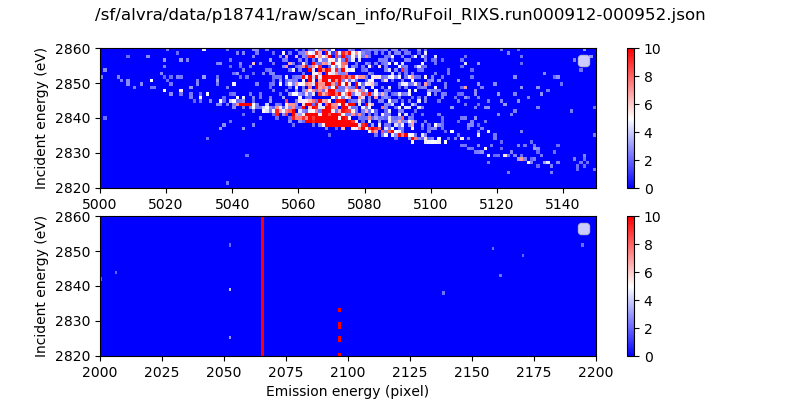

No handles with labels found to put in legend.
No handles with labels found to put in legend.


In [27]:
plt.figure(figsize=(8,4))
plt.suptitle(json_file, fontsize=12)
plt.subplot(211)
plt.imshow(RIXS_roi1, label="Ka", aspect = 'auto', cmap = "bwr", origin ="lower", \
           extent=[roi1[0], roi1[1], Energy_eV[0], Energy_eV[-1]], vmin=0, vmax=10)
plt.xlabel("Emission energy (pixel)")
plt.ylabel("Incident energy (eV)")
plt.colorbar()
plt.legend(loc="best")

plt.subplot(212)
plt.imshow(RIXS_roi3, aspect = 'auto', cmap = "bwr", label="Kb", origin ="lower", \
           extent=[roi3[0], roi3[1], Energy_eV[0], Energy_eV[-1]], vmin=0, vmax=10)
plt.xlabel("Emission energy (pixel)")
plt.ylabel("Incident energy (eV)")
plt.legend(loc="best")
plt.colorbar()
plt.show()


<IPython.core.display.Javascript object>


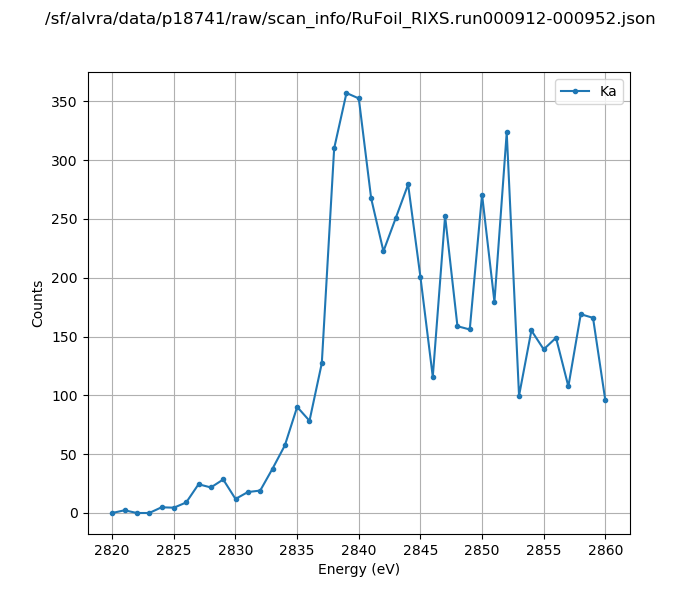

In [29]:
plt.figure(figsize=(7,6))
plt.suptitle(json_file, fontsize=12)

plt.plot(Energy_eV, XAS_roi1,label="Ka", marker='.')
plt.xlabel("Energy (eV)")
plt.ylabel("Counts")
plt.legend(loc="best")
plt.grid()

plt.show()

In [ ]:
def edge_removal(module_edge, roi_removal, array):
    index_edge = module_edge - roi_removal[0]
    array_input = array.copy()
    print (array[index_edge-1:index_edge+3])
    array[index_edge] = array[index_edge-1]/2
    array[index_edge-1] = array[index_edge-1]/2

    array[index_edge+1] = array[index_edge+2]/2
    array[index_edge+2] = array[index_edge+2]/2 
    print (array[index_edge-1:index_edge+3])
    return array, array_input

In [ ]:
spectrum_ON_roi1, spectrum_ON_roi1_orig = edge_removal(6472, roi1, spectrum_ON_roi1) 
spectrum_OFF_roi1, spectrum_OFF_roi1_orig = edge_removal(6472, roi1, spectrum_OFF_roi1) 